# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import re
import statsmodels.api as sm

from statsmodels.formula.api import ols

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
def transformValue (x):
    find_dig = re.findall(r'\d+|\w', x)
    if len(find_dig) == 3:
        num = int(find_dig[0])+int(find_dig[1])*0.1
    else:
        num = int(find_dig[0])
    return num*1000 if find_dig[-1]=="M" else num

In [5]:
fifa['ValueNumeric'] = fifa['Value'].apply(transformValue) # ValueNumeric in k€

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [14]:
# TWO WAY ANOVA. Testing two hypothesis:
# 1. Effect of Preferred Foot on Value
# 2. Effect of Position on  Value
# (First variable in Anova model must be numeric)

model = ols('ValueNumeric ~ C(fifa["Preferred Foot"]) + C(Position)', data=fifa).fit() #fitting linear model
#display(model.summary())
sm.stats.anova_lm(model, typ=3) # Type 3 Anova DataFrame

,sum_sq,df,F,PR(>F)
Intercept,8.612573e+09,1.0,282.239824,7.299550e-63
"C(fifa[""Preferred Foot""])",2.341622e+08,1.0,7.673655,5.608990e-03
C(Position),1.657002e+10,26.0,20.885022,1.634952e-96
Residual,5.529029e+11,18119.0,NaN,NaN


**What is your conclusion from this ANOVA?**

**Null Hypothesis**: The mean (average value of the dependent variable, i.e. ValueNumeric) is the same for all groups (Preferred Foor and Position).

**Result**: 
* The P-value obtained from ANOVA analysis for Position is statistically significant (pvalue = e-96 << 0.05). We reject the null hypothesis.
* The p-value obtained for Preferred foot is statistically significant (pvalue = 0.0056 < 0.05). We reject the null hypothesis.
* The p-value obtained for the intersection between Position and Preferred foot is significant (pvalue = e-63 << 0.05). We reject the null hypothesis.

**Conclusion**: Position, Preferred foot and their intersection significantly affect the value of the football player.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
model2 = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
sm.stats.anova_lm(model2, typ=2) # Type 2 Anova DataFrame

,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+10,163.0,6.762478,4.840477e-134
Residual,5.370951e+11,18043.0,NaN,NaN


**What is your conclusion from this ANOVA?**

**Null Hypothesis**: The mean (average value of the dependent variable, i.e. ValueNumeric) is the same for all groups in Nationality.

**Result**: 
* The P-value is statistically significant (pvalue = e-96 << 0.05)
* However, the p-value obtained for Preferred foot is not significant (pvalue = e-134 > 0.05). We reject the null hypothesis.

**Conclusion**: Nationality significantly affects the value of the football player.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [17]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [43]:
# Let's drop the rows with any null values
fifa = fifa.dropna(axis = 0)
#fifa.isnull().sum()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [59]:
X = fifa[["Stamina","SprintSpeed"]]
Y = fifa["ValueNumeric"]

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          8.04e-193
Time:                        23:01:27   Log-Likelihood:            -1.7972e+05
No. Observations:               17918   AIC:                         3.595e+05
Df Residuals:                   17915   BIC:                         3.595e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3070.0269    196.798    -15.600      0.000   -3455.770   -2684.284
Stamina        60.3696      3.290     18.349      0.000      53.921      66.819
SprintSpeed    26.3121      3.565      7.380      0.000      19.324      33.300
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

**Null Hypothesis**: In linear regression the null hypothesis is that all of the regression coefficients are equal to zero.

**Results**:
* F-test: F-statistic = 453 is the critical F-value, and Prob (F-statistic) = e-193. Not significant.
* Adjusted. R-squared = 0.048, reflects the fit of the model. Lower values mean a bad fit.
* coef: With the coefficients we can get the model:

$$ValueNumeric = 60.3696 * Stamina + 26.3121 * SprintSpeed -3070.0269 $$

**Conclusions**: The model has coefficients equal to zero and cannot be predicted.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [60]:
X = fifa["Potential"]
Y = fifa["ValueNumeric"]

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:05:26   Log-Likelihood:            -1.7650e+05
No. Observations:               17918   AIC:                         3.530e+05
Df Residuals:                   17916   BIC:                         3.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+04    399.569    -88.693      0.000   -3.62e+04   -3.47e+04
Potential    531.1650      5.581     95.172      0.000     520.226     542.105
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

**Null Hypothesis**: All of the regression coefficients are equal to zero.

**Results**:
* F-test: F-statistic = 9058 is the critical F-value, and Prob (F-statistic) = 0.00. Not significant.
* Adjusted. R-squared = 0.336, reflects the fit of the model. Lower values mean a bad fit.
* coef: With the coefficients we can get the model:

$$ValueNumeric = 531.1650 * Potential -3544$$

**Conclusions**: The model has coefficients equal to zero and cannot be predicted.



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

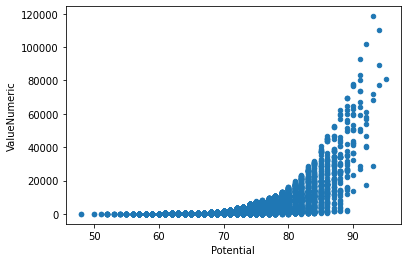

In [70]:
fifa.plot.scatter(x = "Potential", y = "ValueNumeric")

It's not linear, it's exponential!